<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Fourier_Fifth_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_sample_image
from scipy.special import jv

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
hW, hH = 600,300
hFreq = 10.5
x = np.linspace( 0, 1, 2*hW)     # columns (Width)
y = np.linspace( 0, 1, 2*hH)     # rows (Height)
[X,Y] = np.meshgrid(x,y)
Sin = np.sin(hFreq * np.pi * 2 * X)
W,H = np.shape(Sin)

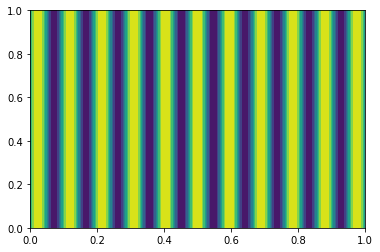

In [5]:
plt.contourf(X,Y,Sin)

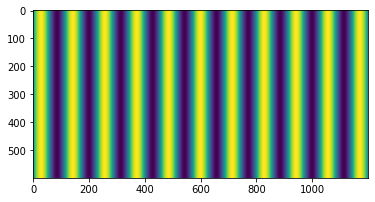

In [6]:
plt.imshow(Sin)

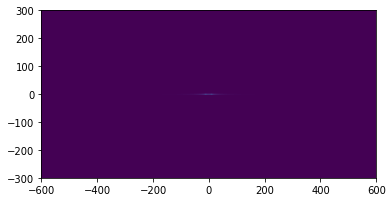

In [7]:
Fourier = np.fft.fft2(Sin)/(W*H)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier)+0.001)
plt.imshow(P, extent=[-hW,hW,-hH,hH])

In [70]:
flower = load_sample_image("flower.jpg") / 255
flower = flower[:-1,:]
flower =  rgb2gray(flower)
H, W = flower.shape

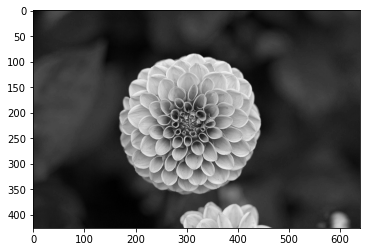

In [76]:
plt.imshow(flower, cmap='gray')
height, width = np.shape(flower)

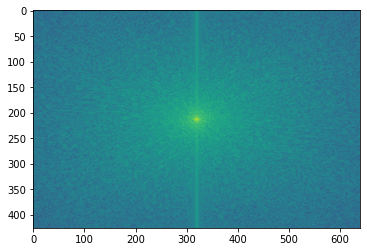

In [77]:
Fourier = np.fft.fft2(flower)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier))
plt.imshow(P)


In [78]:
def mask_creator(height, width, r): #heigth, width
  mask = np.ones((height, width))
  for i in range(height):
    for j in range(width):
      if (j-width/2)**2 + (i-height/2)**2 <r**2:
        mask[i,j] = 0

  return mask

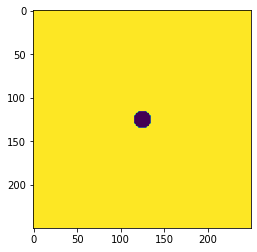

In [79]:
mask = mask_creator(250,250,10)
plt.imshow(mask)

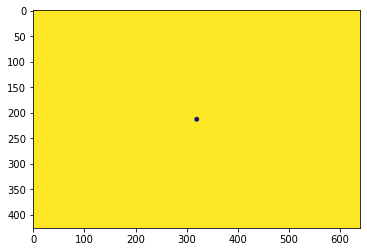

In [97]:
flower_mask = mask_creator(*flower.shape, 5)
plt.imshow(flower_mask)

In [98]:
masked_flower = Fourier * flower_mask

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


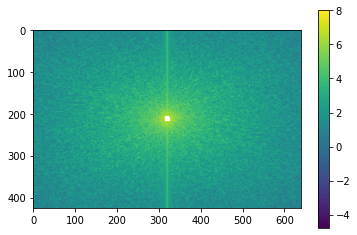

In [99]:
p = np.abs(masked_flower)
plt.imshow(np.log(p))
plt.colorbar()

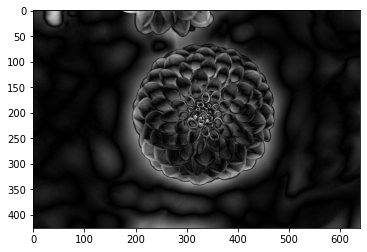

In [100]:
Flower = np.fft.fft2(masked_flower)
plt.imshow(np.abs(Flower), cmap='gray')

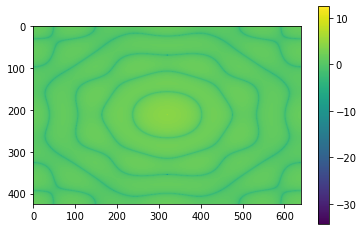

In [103]:
mask_Fourier = np.fft.fft2(flower_mask)
mask_Fourier = np.fft.fftshift(mask_Fourier)
P_mask_Fourier = np.abs(mask_Fourier)
plt.imshow(np.log(P_mask_Fourier))
plt.colorbar()

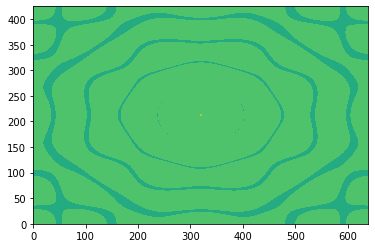

In [102]:
plt.contourf(np.log(P_mask_Fourier))

(0.0, 80.0)

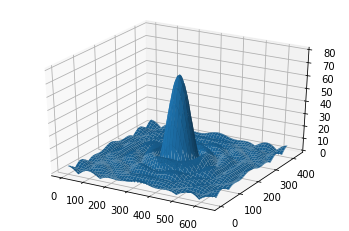

In [115]:
from mpl_toolkits.mplot3d import Axes3D
y = np.arange(0,flower.shape[0])
x = np.arange(0,flower.shape[1])
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,P_mask_Fourier)
ax.set_zlim([0,80])